In [1]:
# Core Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from portfolio_optimizer import portfolio_optimizer
from backtest import backtest, display_backtest_results

# Cosmetics
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from typing import List

# Read Data

In [2]:
# data used to replicate paper results
# VTI, AGG, DBC, VIX
start_date = "2010-01-01"
end_date = "2020-06-30"

price_long_paper = pd.read_csv("data_clean/long_format_daily_original_paper_data.csv")
price_long_paper["Date"] = pd.to_datetime(price_long_paper["Date"])
price_long_paper = price_long_paper.loc[(price_long_paper["Date"] >= start_date) & (price_long_paper["Date"] <= end_date), :]
price_wide_paper = price_long_paper.pivot(index='Date', columns='Ticker', values='Price')

In [3]:
# # full data
# start_date = "1995-01-01"
# end_date = "2022-12-31"

# price_long = pd.read_csv("data_clean/long_format_daily.csv")
# price_long["Date"] = pd.to_datetime(price_long["Date"])
# price_long = price_long.loc[(price_long["Date"] >= start_date) & (price_long["Date"] <= end_date), :]

# # very short data for testing
# price_long_test = price_long.loc[(price_long["Date"] >= '2022-01-01'), :]
# price_wide_test = price_long_test.pivot(index='Date', columns='Ticker', values='Price')
# return_wide_test = price_wide_test.pct_change().iloc[1:,:]

# Replicate Paper Result

In [4]:
%%time
tf.keras.utils.set_random_seed(100)

portfolio_paper = portfolio_optimizer(price_long_paper)
weight_LSTM = portfolio_paper.optimize("LSTM", period = 252)

# static allocations
weight_alloc_1 = weight_LSTM.copy()
weight_alloc_2 = weight_LSTM.copy()
weight_alloc_3 = weight_LSTM.copy()
weight_alloc_4 = weight_LSTM.copy()
weight_alloc_1["Weight"] = 1/4
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VTI", "Weight"] = 1/2
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "AGG", "Weight"] = 1/10
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VTI", "Weight"] = 1/10
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "AGG", "Weight"] = 1/2
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VTI", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "AGG", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "DBC", "Weight"] = 1/10
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VIX", "Weight"] = 1/10

1/1 [==============================] - 0s 193ms/step
successfully optimized portfolio weights
CPU times: user 17.4 s, sys: 1.9 s, total: 19.3 s
Wall time: 16 s


,LSTM,Allocation 1,Allocation 2,Allocation 3,Allocation 4
avg annualized ret,0.171133,0.241715,0.221830,0.194304,0.140771
avg annualized std,0.314784,0.297687,0.207538,0.252811,0.096675
sharpe ratio,0.543652,0.811977,1.068864,0.768573,1.456123
adjusted sharpe ratio,0.556182,0.557261,0.003432,0.605477,-2.024451
skewness,1.067642,2.596907,2.916277,2.443905,2.891536
excess kurtosis,5.983874,24.212207,31.853192,21.341029,34.999354
maximum drawdown,-0.348964,-0.182366,-0.126222,-0.164534,-0.080612
maximum drawdown length (days),520.000000,89.000000,249.000000,89.000000,83.000000
VaR (95%),-0.027701,-0.022812,-0.015943,-0.019591,-0.007292
CVaR (95%),-0.041333,-0.030872,-0.021658,-0.026467,-0.010298


CPU times: user 6.61 s, sys: 90.8 ms, total: 6.7 s
Wall time: 6.68 s


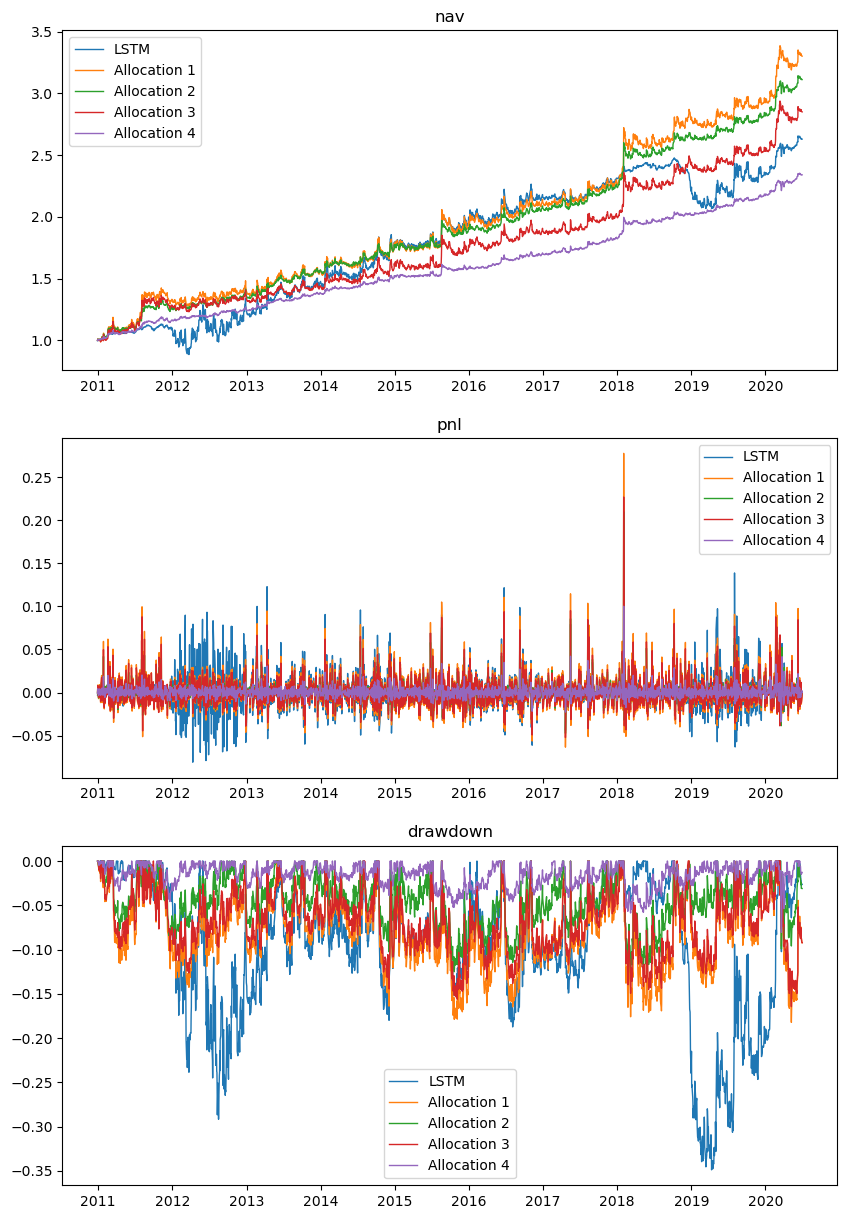

In [5]:
%%time
display_backtest_results([weight_LSTM, weight_alloc_1, weight_alloc_2, weight_alloc_3, weight_alloc_4], 
                         ["LSTM", "Allocation 1", "Allocation 2", "Allocation 3", "Allocation 4"])

# Better Benchmarks

In [6]:
%%time
weight_variance = portfolio_paper.optimize("variance", period = 252)
weight_sharpe = portfolio_paper.optimize("sharpe", period = 252)
weight_markowitz3 = portfolio_paper.optimize("markowitz3", period = 252)
weight_DR = portfolio_paper.optimize("divers_ratio", period = 252)
weight_MRC = portfolio_paper.optimize("marginal_risk_contribution", period = 252)

successfully optimized portfolio weights
successfully optimized portfolio weights
successfully optimized portfolio weights
successfully optimized portfolio weights
successfully optimized portfolio weights
CPU times: user 406 ms, sys: 16.5 ms, total: 423 ms
Wall time: 414 ms


,LSTM,minVar,maxSharpe,Markowitz 3.0,maxDR,minMRC
avg annualized ret,0.171133,0.053237,0.099604,0.106413,0.138780,0.035015
avg annualized std,0.314784,0.034375,0.059276,0.158629,0.076106,0.030779
sharpe ratio,0.543652,1.548737,1.680340,0.670828,1.823509,1.137634
adjusted sharpe ratio,0.556182,-3.164344,-0.697480,-0.058924,-3.427762,0.228074
skewness,1.067642,-1.126662,0.368791,3.851952,0.422870,-1.123463
excess kurtosis,5.983874,27.539843,12.906042,80.985082,21.712677,10.876210
maximum drawdown,-0.348964,-0.087113,-0.103538,-0.240439,-0.144964,-0.070101
maximum drawdown length (days),520.000000,82.000000,80.000000,132.000000,80.000000,96.000000
VaR (95%),-0.027701,-0.002882,-0.004903,-0.008045,-0.005794,-0.002842
CVaR (95%),-0.041333,-0.004823,-0.008201,-0.021779,-0.010217,-0.004429


CPU times: user 8.03 s, sys: 145 ms, total: 8.17 s
Wall time: 8.14 s


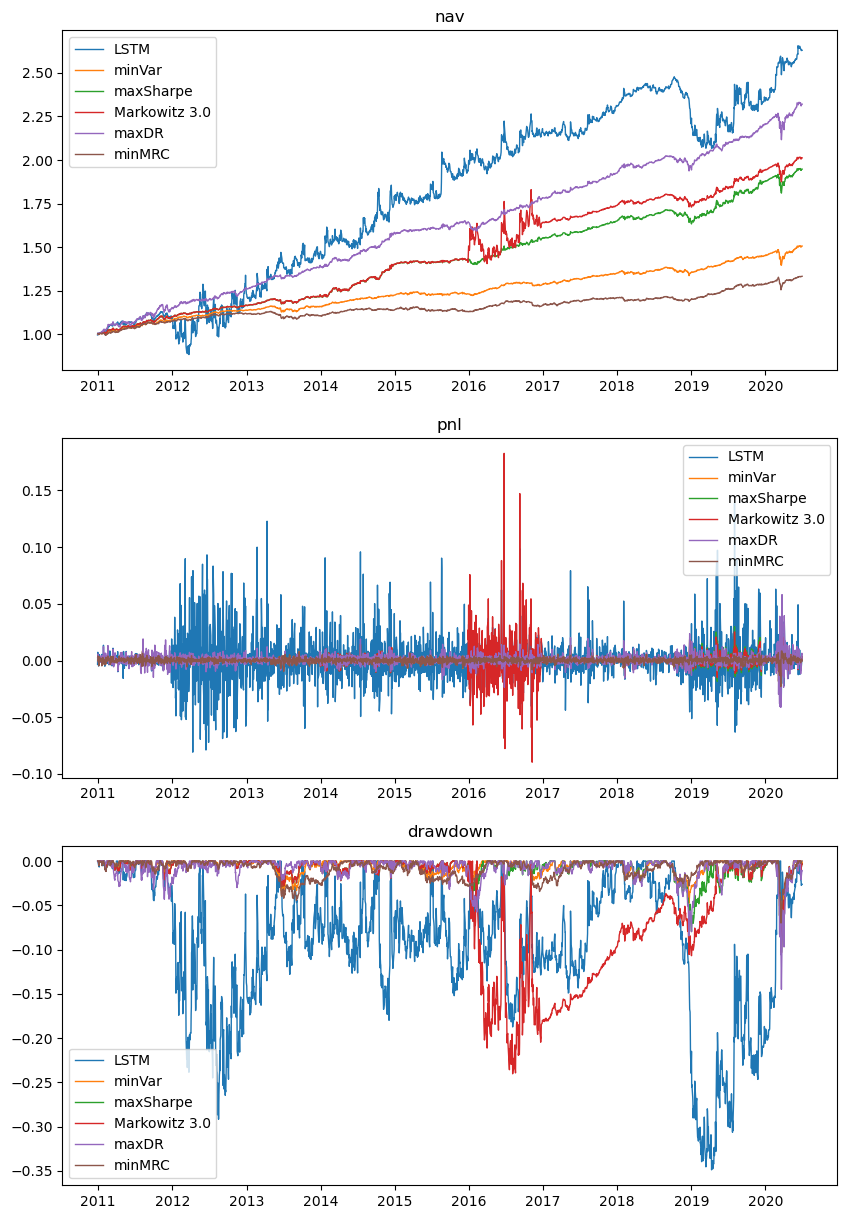

In [7]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_variance,
     weight_sharpe,
     weight_markowitz3,
     weight_DR,
     weight_MRC
    ],
    ["LSTM", "minVar", "maxSharpe", "Markowitz 3.0", "maxDR", "minMRC"]
)

# Improvement: loss function

In [8]:
portfolio_LSTM_return = portfolio_optimizer(price_long_paper, loss = "return")
weight_LSTM_return = portfolio_LSTM_return.optimize("LSTM", period = 252)

1/1 [==============================] - 0s 203ms/step
successfully optimized portfolio weights


In [9]:
portfolio_LSTM_convex = portfolio_optimizer(price_long_paper, loss = "convex")
weight_LSTM_convex = portfolio_LSTM_convex.optimize("LSTM", period = 252)

1/1 [==============================] - 0s 194ms/step
successfully optimized portfolio weights


,LSTM_paper,LSTM_convex,minVar,maxSharpe,Markowitz 3.0,maxDR,minMRC
avg annualized ret,0.171133,0.148628,0.053237,0.099604,0.106413,0.138780,0.035015
avg annualized std,0.314784,0.138444,0.034375,0.059276,0.158629,0.076106,0.030779
sharpe ratio,0.543652,1.073564,1.548737,1.680340,0.670828,1.823509,1.137634
adjusted sharpe ratio,0.556182,0.082146,-3.164344,-0.697480,-0.058924,-3.427762,0.228074
skewness,1.067642,3.047026,-1.126662,0.368791,3.851952,0.422870,-1.123463
excess kurtosis,5.983874,30.583176,27.539843,12.906042,80.985082,21.712677,10.876210
maximum drawdown,-0.348964,-0.100700,-0.087113,-0.103538,-0.240439,-0.144964,-0.070101
maximum drawdown length (days),520.000000,415.000000,82.000000,80.000000,132.000000,80.000000,96.000000
VaR (95%),-0.027701,-0.010647,-0.002882,-0.004903,-0.008045,-0.005794,-0.002842
CVaR (95%),-0.041333,-0.014937,-0.004823,-0.008201,-0.021779,-0.010217,-0.004429


CPU times: user 9.19 s, sys: 126 ms, total: 9.32 s
Wall time: 9.26 s


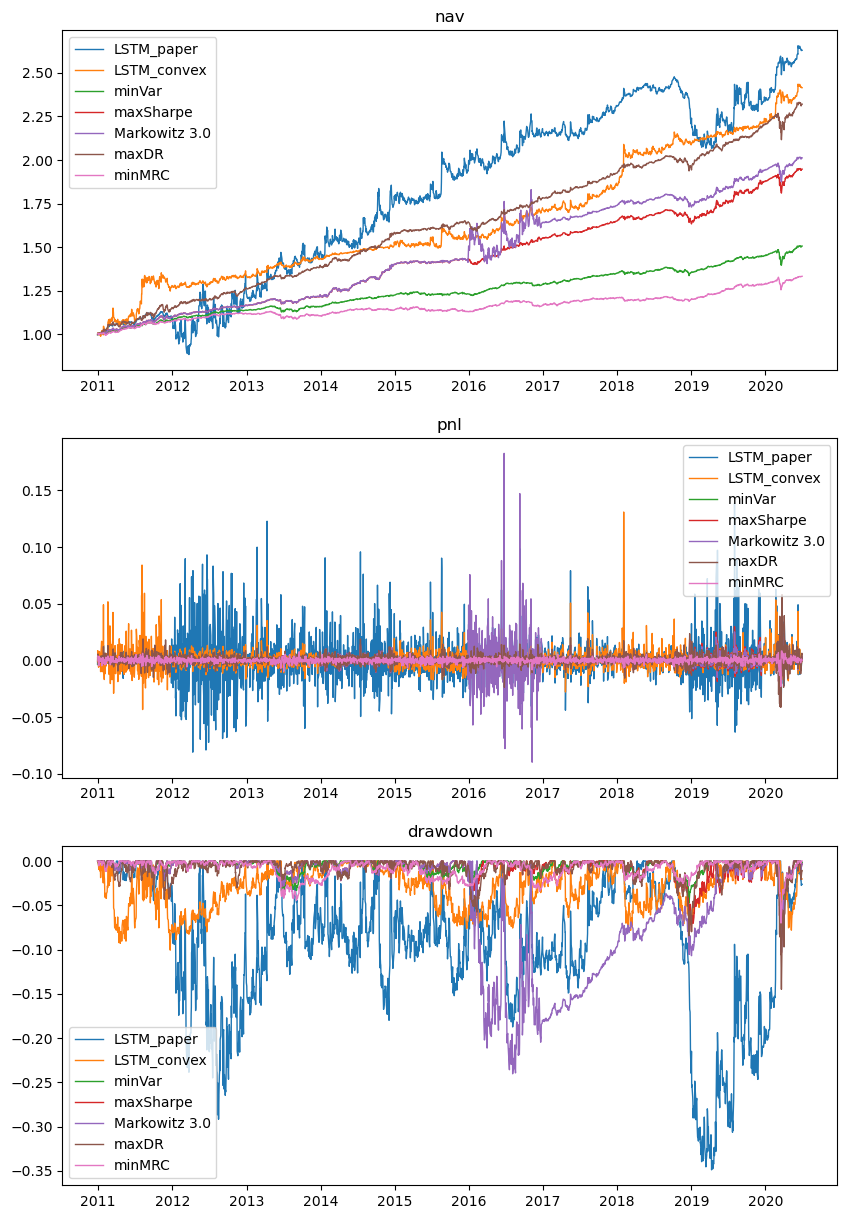

In [40]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_LSTM_convex,
     weight_variance,
     weight_sharpe,
     weight_markowitz3,
     weight_DR,
     weight_MRC
    ],
    ["LSTM_paper", "LSTM_convex", "minVar", "maxSharpe", "Markowitz 3.0", "maxDR", "minMRC"]
)

# Improvement: regularization

In [13]:
portfolio_LSTM_reg = portfolio_optimizer(price_long_paper, reg = True)
weight_LSTM_reg = portfolio_LSTM_reg.optimize_LSTM_reg(252)

1/1 [==============================] - 0s 193ms/step


,LSTM_paper,LSTM_l2reg,minVar,maxSharpe,Markowitz 3.0,maxDR,minMRC
avg annualized ret,0.171133,0.256204,0.053237,0.099604,0.106413,0.138780,0.035015
avg annualized std,0.314784,0.357929,0.034375,0.059276,0.158629,0.076106,0.030779
sharpe ratio,0.543652,0.715794,1.548737,1.680340,0.670828,1.823509,1.137634
adjusted sharpe ratio,0.556182,0.359625,-3.164344,-0.697480,-0.058924,-3.427762,0.228074
skewness,1.067642,3.261594,-1.126662,0.368791,3.851952,0.422870,-1.123463
excess kurtosis,5.983874,41.534314,27.539843,12.906042,80.985082,21.712677,10.876210
maximum drawdown,-0.348964,-0.243872,-0.087113,-0.103538,-0.240439,-0.144964,-0.070101
maximum drawdown length (days),520.000000,166.000000,82.000000,80.000000,132.000000,80.000000,96.000000
VaR (95%),-0.027701,-0.027753,-0.002882,-0.004903,-0.008045,-0.005794,-0.002842
CVaR (95%),-0.041333,-0.040313,-0.004823,-0.008201,-0.021779,-0.010217,-0.004429


CPU times: user 9.43 s, sys: 87.6 ms, total: 9.52 s
Wall time: 9.48 s


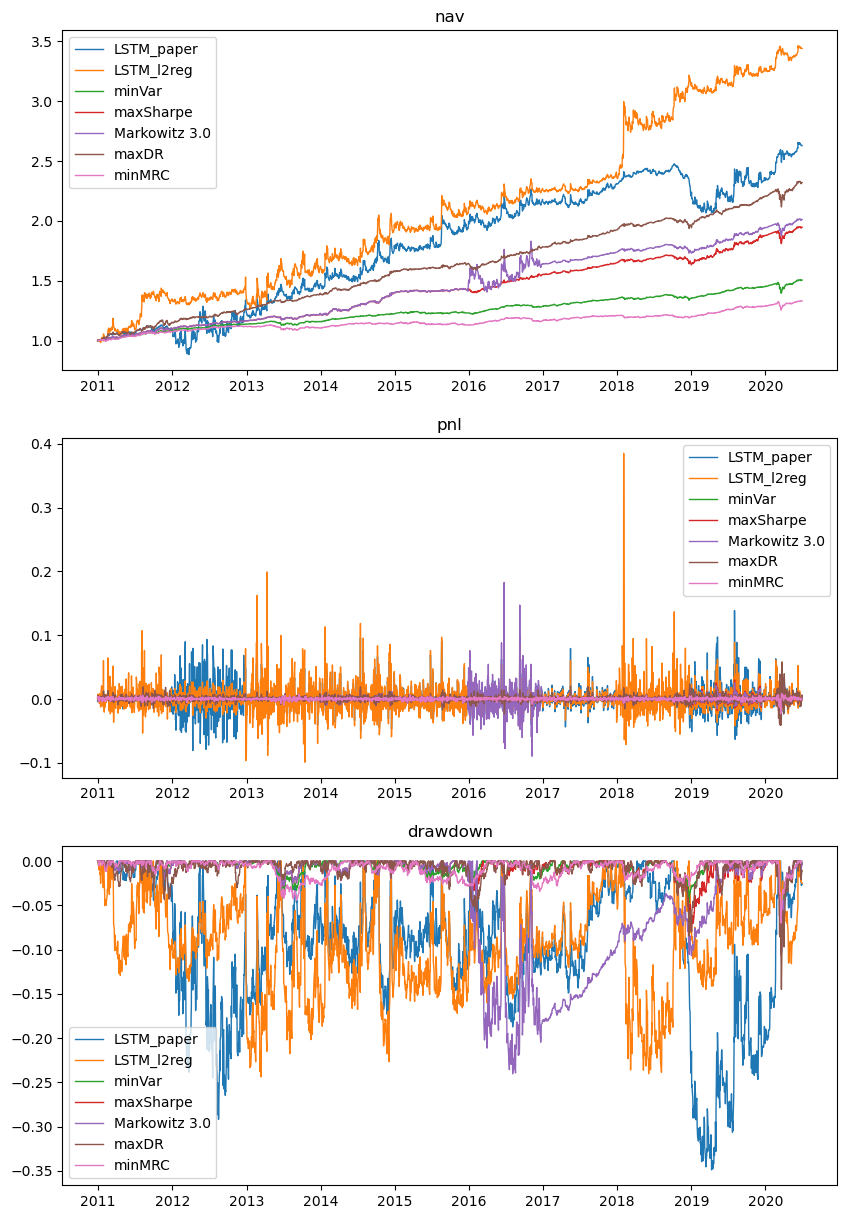

In [14]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_LSTM_reg,
     weight_variance,
     weight_sharpe,
     weight_markowitz3,
     weight_DR,
     weight_MRC
    ],
    ["LSTM_paper", "LSTM_l2reg", "minVar", "maxSharpe", "Markowitz 3.0", "maxDR", "minMRC"]
)